<h1 align="center" style="color:brown;font-size:300%">Lab 5 : Radial Basis Functions</h1>


<div class="alert alert-block alert-info" >
<b style="font-size:200%">Question 1:</b> Demonstrate the capability of an RBF network to model the XOR logic gate. Generate
performance curves/surfaces for these RBF-models as the inputs vary continuously from 0.0 to
1.0.
</div>

<div class="alert alert-block alert-success">
<b>But first:</b> Let us understand what an XOR gate is.
</div>

An XOR (exclusive OR) gate is a digital logic gate that outputs true or high (1) only when the number of true inputs is odd. In other words, for a two-input XOR gate, the output is true if and only if one of the inputs is true while the other is false.

### XOR Gate Truth Table

| Input A | Input B | Output (A XOR B) |
|---------|---------|------------------|
|    0    |    0    |        0         |
|    0    |    1    |        1         |
|    1    |    0    |        1         |
|    1    |    1    |        0         |

### Explanation

- When both inputs are 0, the output is 0.
- When one input is 0 and the other input is 1, the output is 1.
- When both inputs are 1, the output is 0.

In essence, the XOR gate produces a high output only when the inputs are different.

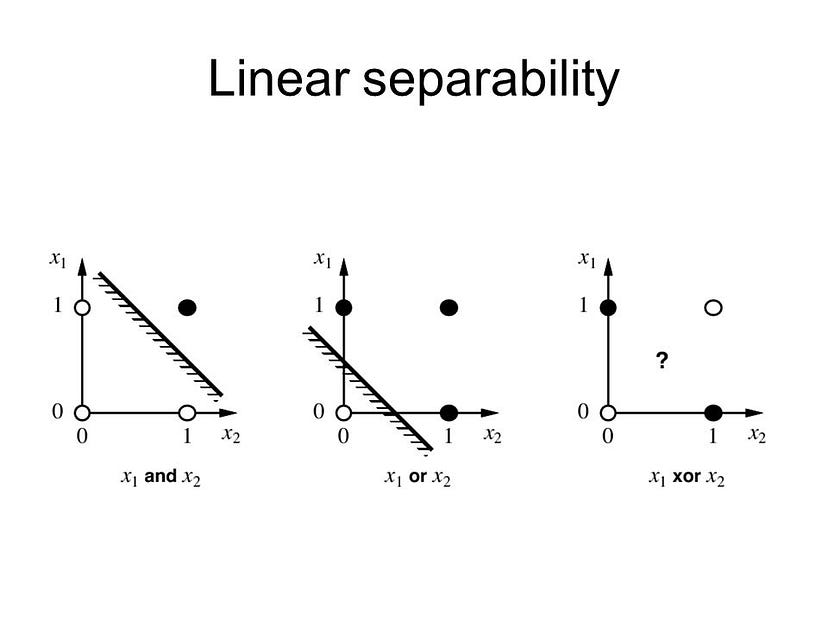

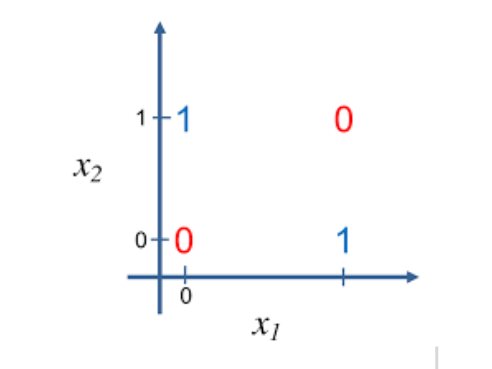

<div class="alert alert-block alert-danger">
<b>!!</b> As we can see by visualizing this plot, it is impossible to separate the different outputs (1 and 0) using a linear equation.
</div>

<div class="alert alert-block alert-info">
<b>Intuition :</b> In general there is always a possibility that the input feature vector which is not linearly separable on current dimensions can become linearly separable while projecting on higher dimensions.
</div>

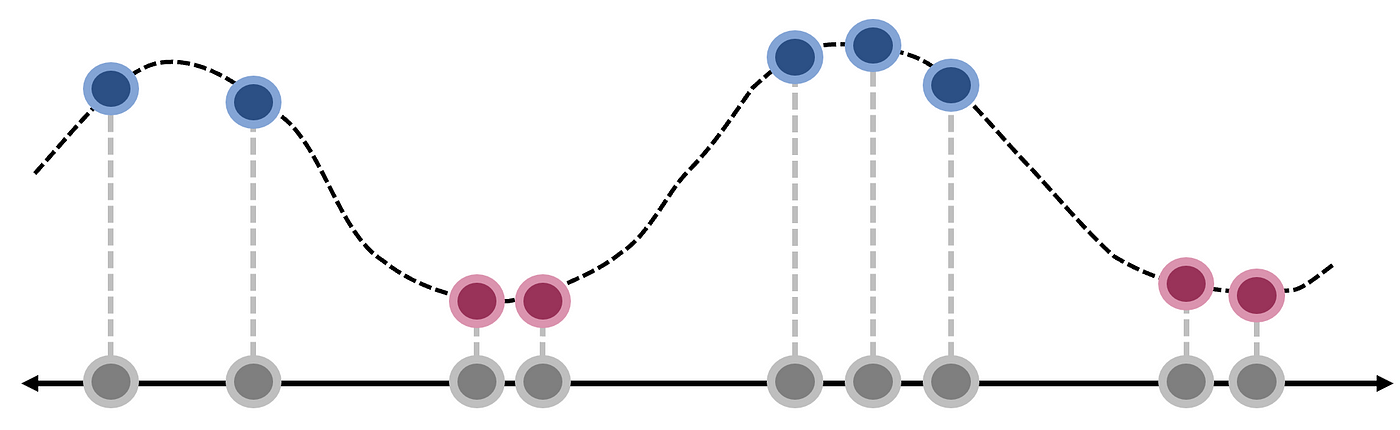

As we can see in the picture that the points are not linearly separable when plotted in 1d. However if we push to a higher dimension space, in this case 2D the problem boils down to a linearly separable one.


2 ways: 

a) Imposes non linear transformation on input feature vector.

b) Increases Dimensionality of feature vector.

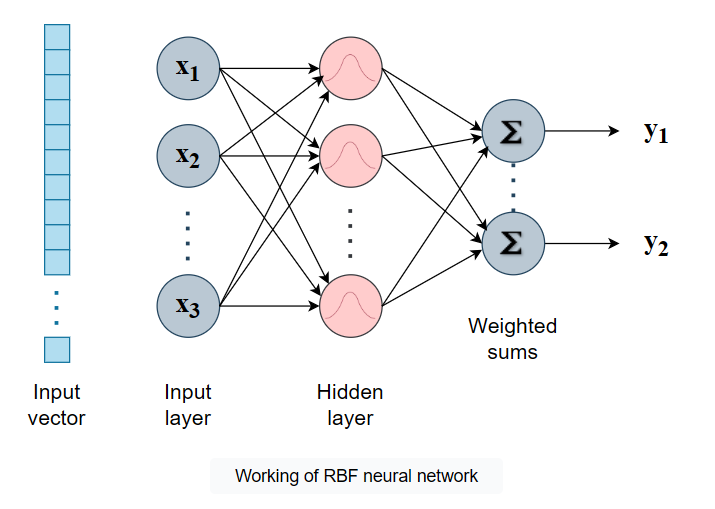

In [2]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import math

In [3]:
# defining the euclidean distance formula
def euclid_dist(x,y):
    return math.dist(x,y)

In [4]:
#defining phi (x) formula based on centers and spread r
def phi(x,c,r):
    return math.exp((-euclid_dist(x,c))/(r**2))

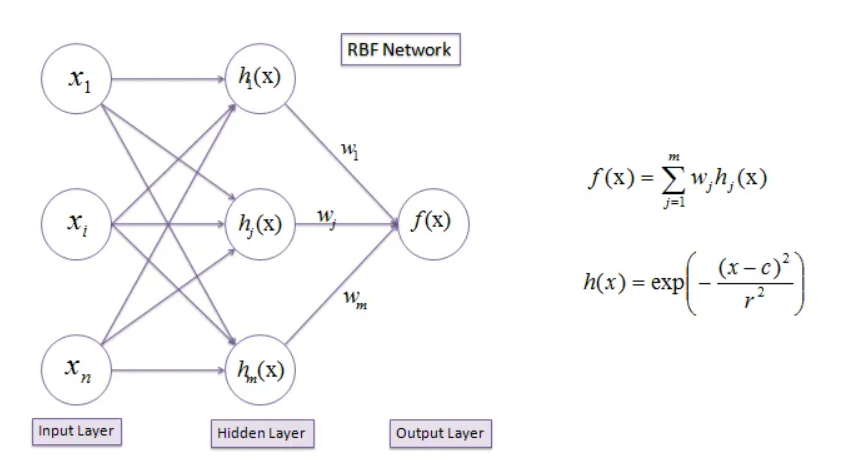

In [5]:
# Input layers, centers and spread value initialization
inp=[[0,0],[0,1],[1,0],[1,1]]
# c1=[[0,0],[0,1],[1,0],[1,1]]
c1=[[0,0],[1,1]]

r=math.sqrt(2)

In [6]:
# def activation(x):
#     if 1/(math.exp(-x)+1)<0.5:
#         return 0
#     else:
#         return 1

In [7]:
#Simple step activation function that is used to map the weighted output to the 0-1 output of XOR gate
def activation(x):
    if (x<0):
        return 0
    else:
        return 1

In [8]:
#logci implementation: Calculation of Phi values for each input vector
phi_ij = []
wts=[]
bias=[]
b=np.random.normal(0, 1)
w = np.random.normal(0, 1, (2, 2))[:, 0]

for i in range(len(inp)):
    row = []
    for j in range(len(c1)):
        row.append(phi(inp[i], c1[j], r))
        
    phi_ij.append(row)
    

In [9]:
phi_ij = np.array(phi_ij)


In [11]:
#Output values
y_true = np.array([0, 1, 1, 0])


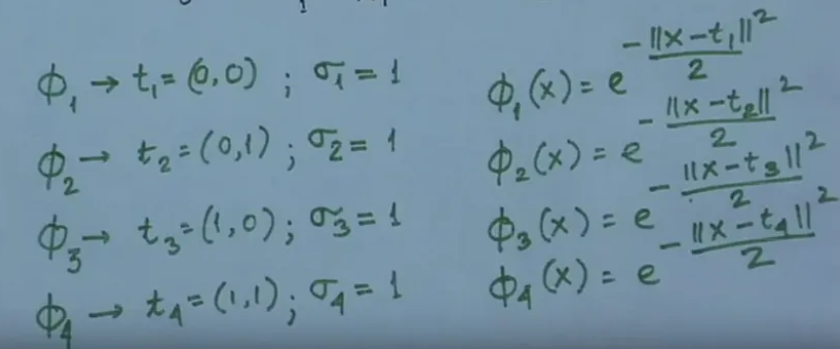

In [12]:
learning_rate = 0.1  #We may take different learning rates and epochs to see the optimum value
epochs = 1000

errors = []
wts=[]
bias=[]

for epoch in range(epochs):
    # Forward pass
    z = np.dot(phi_ij, w) + b
    y_pred = np.array([activation(zi) for zi in z])
    
    error = y_true - y_pred
    
    errors.append(np.mean(np.abs(error)))
    
    w += learning_rate * np.dot(phi_ij.T, error)
    b += learning_rate * np.sum(error)
    
    # Print error every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Error: {errors[-1]}")



Epoch 0, Error: 0.5
Epoch 50, Error: 0.0
Epoch 100, Error: 0.0
Epoch 150, Error: 0.0
Epoch 200, Error: 0.0
Epoch 250, Error: 0.0
Epoch 300, Error: 0.0
Epoch 350, Error: 0.0
Epoch 400, Error: 0.0
Epoch 450, Error: 0.0
Epoch 500, Error: 0.0
Epoch 550, Error: 0.0
Epoch 600, Error: 0.0
Epoch 650, Error: 0.0
Epoch 700, Error: 0.0
Epoch 750, Error: 0.0
Epoch 800, Error: 0.0
Epoch 850, Error: 0.0
Epoch 900, Error: 0.0
Epoch 950, Error: 0.0


In [13]:
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Testing:</b> Let us test the RBNN.
</div>

In [14]:
print("\nTesting the XOR gate:")
for x, target in zip(inp, y_true):
    phi_x = np.array([phi(x, c, r) for c in c1])
    z = np.dot(phi_x, w) + b
    pred = activation(z)
    print(f"Input: {x}, Output: {pred}, Target: {target}")


Testing the XOR gate:
Input: [0, 0], Output: 0, Target: 0
Input: [0, 1], Output: 1, Target: 1
Input: [1, 0], Output: 1, Target: 1
Input: [1, 1], Output: 0, Target: 0


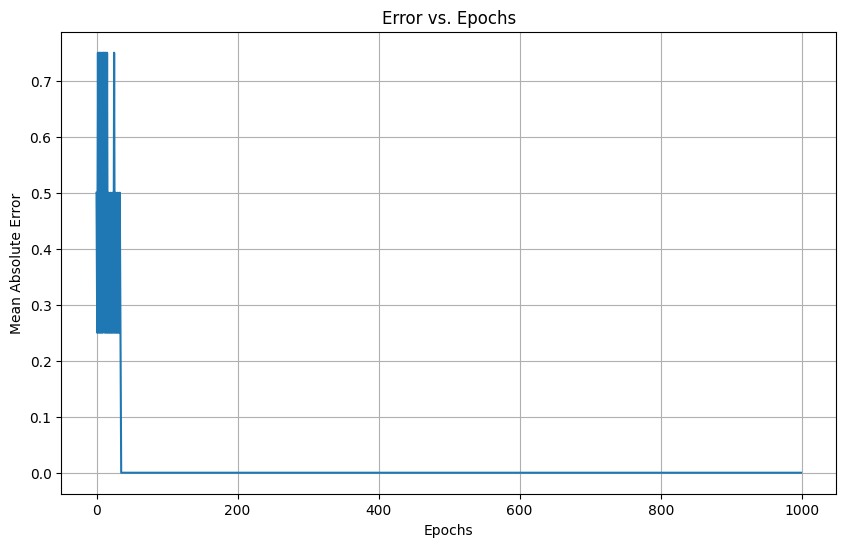

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), errors)
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()



In [16]:
phi_ij

array([[1.        , 0.49306869],
       [0.60653066, 0.60653066],
       [0.60653066, 0.60653066],
       [0.49306869, 1.        ]])

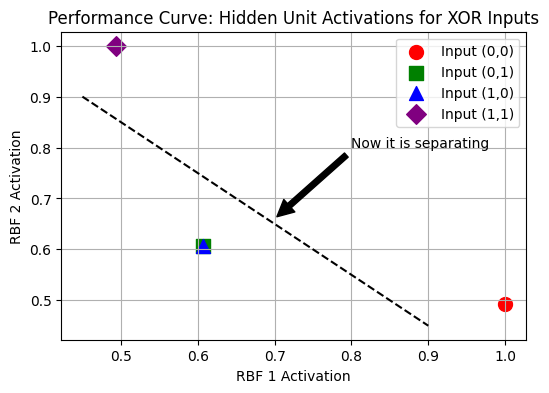

In [17]:
plt.figure(figsize=(6, 4))

colors = ['red', 'green', 'blue', 'purple']
markers = ['o', 's', '^', 'D']  

labels = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']

for i in range(4):
    plt.scatter(phi_ij[i, 0], phi_ij[i, 1], 
                color=colors[i], marker=markers[i], s=100, 
                label=f'Input {labels[i]}')

plt.xlabel('RBF 1 Activation')
plt.ylabel('RBF 2 Activation')
plt.title('Performance Curve: Hidden Unit Activations for XOR Inputs')
plt.plot([0.45, 0.9], [0.9, 0.45], "k--")
plt.annotate("Now it is separating", xy=(0.7, 0.66), xytext=(0.8, 0.8),
                arrowprops=dict(facecolor='black', shrink=0.03))

plt.legend()

plt.grid(True)

plt.show()

<div class="alert alert-block alert-info">
<b style="font-size:200%">Question 2:</b> Use radial basis function neural network to separate classes in the Iris database of the UCI
Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html
</div>

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# Data set load
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
y[:5]

array([0, 0, 0, 0, 0])

In [15]:
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from scipy.spatial.distance import cdist

### User defined RBFNN class to model output using RBF network

In [17]:
class RBFNN:
    def __init__(self,num_input,num_hidden,num_output):
        self.num_input = num_input
        self.num_hidden = num_hidden
        self.num_output = num_output
        
        self.centers=None
        self.spreads=None
        
        self.weights=np.random.randn(num_hidden,num_output)
        self.bias=np.random.randn(num_output)
        
        
    def rbf_function(self,X,centers,spreads):
        distances=cdist(X,centers,'euclidean')
        return np.exp(-(distances**2)/(2*(spreads*2)))
    
    def initialize_centers_spreads(self,X):
        from sklearn.cluster import KMeans
        kmeans=KMeans(n_clusters=num_hidden,random_state=42).fit(X)
        self.centers=kmeans.cluster_centers_
        self.spreads=np.std(X,axis=0).mean()
        
        
    def fit(self,X,y,learning_rate=0.01,epochs=100):
        self.initialize_centers_spreads(X)
        
        y_one_hot=np.eye(self.num_output)[y]
        
        for epoch in range(epochs):
            RBF_activations=self.rbf_function(X,self.centers,
                                               self.spreads)
            outputs=RBF_activations.dot(self.weights)+self.bias
            
            error=y_one_hot-outputs
            
            self.weights+=learning_rate*RBF_activations.T.dot(error)
            self.bias+=learning_rate*error.sum(axis=0)
            
    def predict(self,X):
        RBF_activations=self.rbf_function(X,self.centers,self.spreads)
        outputs=RBF_activations.dot(self.weights)+self.bias
        return np.argmax(outputs,axis=1)

        

In [18]:
num_input=X_train.shape[1]
num_hidden=1  #one hidden input layer
num_output=len(np.unique(y_train))

rbf_nn=RBFNN(num_input,num_hidden,num_output)

In [19]:
rbf_nn.fit(X_train,y_train,learning_rate=0.001,epochs=1000)

In [20]:
y_pred=rbf_nn.predict(X_test)

In [21]:
y_test[:5],y_pred[:5]

(array([1, 0, 2, 1, 1]), array([1, 0, 0, 1, 1], dtype=int64))

### Test accuracy check

In [25]:
np.mean(y_pred==y_test)

0.935


<div class="alert alert-block alert-danger">
<b>Continued in part 2 notebook</b> 
</div>